In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from kan import *
from ML_analyze import get_all_feature_Sq2D_data
import torch
from kan.utils import create_dataset_from_data
from KAN_analyze import *
torch.set_default_dtype(torch.float64)


In [2]:
folder = "../data/20240924_random"
rand_num = 5500
rand_max = 1
L = 200
parameters = []
for i in range(rand_num):
    filename = f"{folder}/obs_L{L}_random_run{i}.csv"
    if os.path.exists(filename):
        parameters.append([L, i])
    if len(parameters) >= rand_max:
        break
#print("parameters", parameters)
print("total number of parameters", len(parameters))


total number of parameters 1


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
# get data for optimization/training
x_kan, y_kan = get_data_for_KAN(folder, parameters)
x_kan = torch.tensor(x_kan, device=device)
y_kan = torch.tensor(y_kan, device=device)
dataset = create_dataset_from_data(x_kan, y_kan, device=device)
print("dataset['train_input'].shape, dataset['train_label'].shape", dataset['train_input'].shape, dataset['train_label'].shape)

cpu

qr.shape, qtheta.shape, kappa.shape, f.shape, gamma.shape (2601,) (2601,) (1,) (1,) (1,)
all_Sq2D_flatten.shape (1, 2601)
x_KAN.shape, y_KAN.shape (2601, 5) (2601,)
dataset['train_input'].shape, dataset['train_label'].shape torch.Size([2080, 5]) torch.Size([2080])


In [4]:
model = KAN(width=[5,5,1], grid=3, k=4, seed=42, device=device)

checkpoint directory created: ./model
saving model version 0.0


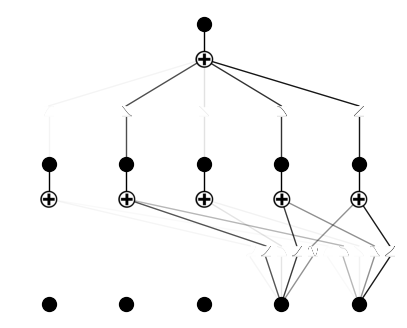

In [5]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot()

In [6]:
# train the model
model.fit(dataset, opt="Adam", steps=20, lamb=0.001);

| train_loss: 5.75e+00 | test_loss: 1.55e+00 | reg: 3.35e+01 | : 100%|█| 20/20 [00:00<00:00, 21.79it

saving model version 0.1


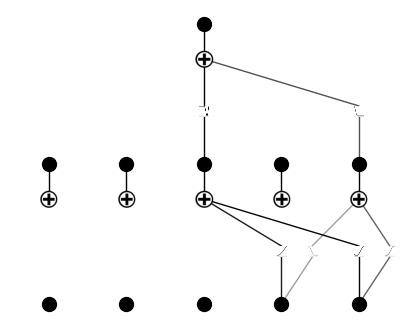

In [7]:
model.plot()

In [25]:
#qb = np.linspace(-np.pi/4, np.pi/4, 51)
#qx, qy = np.meshgrid(qb, qb)

qx = x_kan[:,3]
qy = x_kan[:,4]
#qx = qx.flatten()
#qy = qy.flatten()
#qr = np.sqrt(qx**2 + qy**2)
#qtheta = np.arctan2(qy, qx)
#qr = qr.flatten()
#qtheta = qtheta.flatten()

# 11.2702,  0.1216,  0.8914
kappa = np.ones_like(qx)*np.array(dataset['train_input'])[0,0]
f = np.ones_like(qx)*np.array(dataset['train_input'])[0,1]
gamma = np.ones_like(qx)*np.array(dataset['train_input'])[0,2]
#input = np.vstack([kappa, f, gamma, qr, qtheta]).T
input = np.vstack([kappa.flatten(), f.flatten(), gamma.flatten(), qx.flatten(), qy.flatten()]).T
input.shape

(2601, 5)

In [26]:
I = model(torch.tensor(input))
I = np.reshape(I.detach().cpu().numpy(), qx.shape)
I.shape

(2601,)

TypeError: Input z must be 2D, not 1D

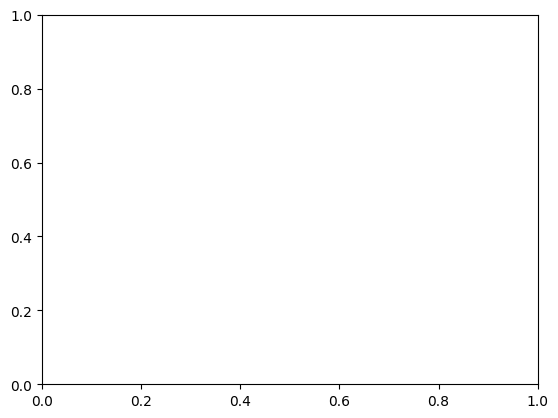

In [24]:
plt.contourf(qx, qy, I, levels=50, cmap='viridis')
plt.colorbar(label='I')
plt.xlabel('qx')
plt.ylabel('qy')
plt.title('Contour plot of I versus qx and qy')
plt.show()

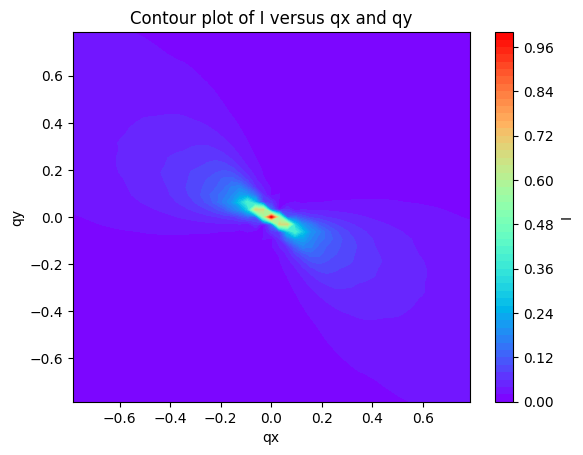

In [20]:
data_qx = x_kan[:,3]
data_qy = x_kan[:,4]
data_I = y_kan
data_qx = np.reshape(data_qx, qx.shape)
data_qy = np.reshape(data_qy, qx.shape)
data_I = np.reshape(data_I, qx.shape)
plt.contourf(data_qx, data_qy, data_I, levels=50, cmap='rainbow')
plt.colorbar(label='I')
plt.xlabel('qx')
plt.ylabel('qy')
plt.title('Contour plot of I versus qx and qy')
plt.show()